# GRU

[인공지능 차세대 톱스타, 한국인 조경현 교수](https://brunch.co.kr/@hvnpoet/127)


<img src="https://d.pr/i/5xtgUb+" width="500"/>


**GRU(Gated Recurrent Unit)**는 RNN의 변형 구조 중 하나로, **LSTM(Long Short-Term Memory)**와 유사하지만 구조가 더 간단하다. GRU는 **게이트 구조**를 사용해 RNN의 **기울기 소멸 문제**를 해결하면서도, 연산량을 줄이고 효율적으로 학습할 수 있도록 설계되었다.(문제에 따라 LSTM보다 더 나은 경우도 있다.)


1. **단순화된 구조**
   - GRU는 LSTM에서 사용되는 **셀 상태(Cell State)**와 **은닉 상태(Hidden State)**를 하나로 통합하여 **은닉 상태(h)**만 유지한다.
   - LSTM의 3가지 게이트(망각, 입력, 출력 게이트) 대신, GRU는 **업데이트 게이트(Update Gate)**와 **리셋 게이트(Reset Gate)**의 2가지 게이트만 사용한다.

2. **장단기 의존성 처리**
   - GRU는 중요한 정보는 기억하고, 불필요한 정보는 잊는 과정을 통해 장기 의존성과 단기 의존성을 모두 처리할 수 있다.

3. **연산 효율성**
   - 구조가 단순하기 때문에 LSTM보다 계산량이 적고, 학습 속도가 더 빠르다.

**GRU의 게이트 구조**

1. **리셋 게이트 (Reset Gate)**  
   - 과거 정보를 **얼마나 잊을지** 결정한다.
   - 이전 은닉 상태가 현재 입력에 얼마나 반영될지를 제어한다.  
   - 수식:  
$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
$$

2. **은닉 상태 업데이트**  
   - 새로운 은닉 상태는 리셋 게이트를 적용한 이전 은닉 상태와 현재 입력 정보를 결합하여 생성된다.  
   - 수식:  
$$
\tilde{h}_t = \tanh(W_h \cdot [r_t \cdot h_{t-1}, x_t] + b_h)
$$

3. **업데이트 게이트 (Update Gate)**  
   - 정보의 **기억 여부**를 결정한다.
   - 이전 시점의 정보와 현재 입력 정보를 결합하여 다음 은닉 상태에 어떤 정보를 전달할지 제어한다.  
   - 수식:  
$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
$$



4. **최종 은닉 상태**  
   - 업데이트 게이트를 사용해 이전 은닉 상태와 새로운 은닉 상태를 조합하여 최종 은닉 상태를 계산한다.  
   - 수식:  
$$
h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t
$$

**GRU와 LSTM의 차이점**

| **특징**            | **LSTM**                                          | **GRU**                                  |
|----------------------|--------------------------------------------------|------------------------------------------|
| **게이트 수**        | 3개 (입력, 망각, 출력 게이트)                    | 2개 (업데이트 게이트, 리셋 게이트)              |
| **상태**            | 셀 상태(Cell State), 은닉 상태(Hidden State)      | 은닉 상태(Hidden State)만 사용           |
| **구조의 복잡성**   | 복잡함                                           | 단순함                                   |
| **계산량**          | 상대적으로 많음                                  | 상대적으로 적음                          |
| **성능 차이**        | 복잡한 시퀀스 데이터에 강점                      | 빠르고 간단한 시퀀스 데이터에 적합        |

In [1]:
import torch
import torch.nn as nn

batch_size = 2     # 배치크기 B
seq_len = 3        # 시퀀스 길이(타임스텝 수) T
input_size = 4     # 입력 특성 차원 F(I)
hidden_size = 5    # GRU 은닉 상태 차원 H

x = torch.randn(batch_size, seq_len, input_size)    # 더미 입력 데이터 생성 (B, T, I)

gru = nn.GRU(input_size, hidden_size, batch_first=True)    # 입출력 형태 (B, T, *)

output, hidden = gru(x)    # 순전파 실행 (전체 출력, 마지막 은닉 상태)
print(output.shape) # (batch_size, sql_len, hidden_size)
print(hidden.shape) # (num_layers, batch_size, hidden_size)

torch.Size([2, 3, 5])
torch.Size([1, 2, 5])


## IMDB 데이터셋

In [ ]:
from tensorflow.keras.datasets import imdb  # IMDB 영화리뷰 감성분석 데이터셋

vocab_size = 300  # 사용할 단어 사전 크기 (상위 빈도수 기준 300개 단어)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

c:\Users\Playdata\nlp\nlp_venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


(25000,) (25000,)
(25000,) (25000,)


### 리뷰데이터 디코드

In [5]:
word_index = imdb.get_word_index() 
sorted(word_index.items(), key=lambda x: x[1])

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10),
 ('this', 11),
 ('that', 12),
 ('was', 13),
 ('as', 14),
 ('for', 15),
 ('with', 16),
 ('movie', 17),
 ('but', 18),
 ('film', 19),
 ('on', 20),
 ('not', 21),
 ('you', 22),
 ('are', 23),
 ('his', 24),
 ('have', 25),
 ('he', 26),
 ('be', 27),
 ('one', 28),
 ('all', 29),
 ('at', 30),
 ('by', 31),
 ('an', 32),
 ('they', 33),
 ('who', 34),
 ('so', 35),
 ('from', 36),
 ('like', 37),
 ('her', 38),
 ('or', 39),
 ('just', 40),
 ('about', 41),
 ("it's", 42),
 ('out', 43),
 ('has', 44),
 ('if', 45),
 ('some', 46),
 ('there', 47),
 ('what', 48),
 ('good', 49),
 ('more', 50),
 ('when', 51),
 ('very', 52),
 ('up', 53),
 ('no', 54),
 ('time', 55),
 ('she', 56),
 ('even', 57),
 ('my', 58),
 ('would', 59),
 ('which', 60),
 ('only', 61),
 ('story', 62),
 ('really', 63),
 ('see', 64),
 ('their', 65),
 ('had', 66),
 ('can', 67),
 ('were', 68),
 ('me', 69),
 ('well', 70),
 ('than', 71),


In [3]:
# 단어사전 확인
word_index = imdb.get_word_index()    # 단어 -> 인덱스 사전

# index_word를 생성
index_from = 2 # 기본설정
index_word = {index + index_from: word for word, index in word_index.items() if index <= vocab_size}
index_word[0] = '[PAD]'
index_word[1] = '[START]'
index_word[2] = '[UNK]'
index_word = dict(sorted(index_word.items(), key=lambda x: x[0]))
index_word

{0: '[PAD]',
 1: '[START]',
 2: '[UNK]',
 3: 'the',
 4: 'and',
 5: 'a',
 6: 'of',
 7: 'to',
 8: 'is',
 9: 'br',
 10: 'in',
 11: 'it',
 12: 'i',
 13: 'this',
 14: 'that',
 15: 'was',
 16: 'as',
 17: 'for',
 18: 'with',
 19: 'movie',
 20: 'but',
 21: 'film',
 22: 'on',
 23: 'not',
 24: 'you',
 25: 'are',
 26: 'his',
 27: 'have',
 28: 'he',
 29: 'be',
 30: 'one',
 31: 'all',
 32: 'at',
 33: 'by',
 34: 'an',
 35: 'they',
 36: 'who',
 37: 'so',
 38: 'from',
 39: 'like',
 40: 'her',
 41: 'or',
 42: 'just',
 43: 'about',
 44: "it's",
 45: 'out',
 46: 'has',
 47: 'if',
 48: 'some',
 49: 'there',
 50: 'what',
 51: 'good',
 52: 'more',
 53: 'when',
 54: 'very',
 55: 'up',
 56: 'no',
 57: 'time',
 58: 'she',
 59: 'even',
 60: 'my',
 61: 'would',
 62: 'which',
 63: 'only',
 64: 'story',
 65: 'really',
 66: 'see',
 67: 'their',
 68: 'had',
 69: 'can',
 70: 'were',
 71: 'me',
 72: 'well',
 73: 'than',
 74: 'we',
 75: 'much',
 76: 'been',
 77: 'bad',
 78: 'get',
 79: 'will',
 80: 'do',
 81: 'also',
 

In [7]:
# 리뷰 디코드
print(X_train[0])
decoded = ' '.join([index_word.get(seq, '?') for seq in X_train[0]])
print(decoded)

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[START] that on as about [UNK] [UNK] [UNK] [UNK] really [UNK] [UNK] see [UNK] and again who each a are any about [UNK] life what [UNK] [UNK] br they [UNK] everything a though and part

In [8]:
# 메모리사용량 조절 train_size, test_size
train_size = 15000
test_size = 10000
X_train = X_train[:train_size]
y_train = y_train[:train_size]
X_test = X_test[:test_size]
y_test = y_test[:test_size]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15000,) (15000,)
(10000,) (10000,)


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

In [11]:
# torch tensor 변환
X_train = [torch.tensor(seq, dtype=torch.long) for seq in X_train]  # 토큰 시퀀스(list)를 LongTensor로 변환
X_test = [torch.tensor(seq, dtype=torch.long) for seq in X_test]

# 라벨데이터 2차원으로 준비
y_train = torch.tensor(y_train, dtype=torch.float).unsqueeze(1)    # 라벨은 FloatTensor로 변환 후 (N,) -> (N, 1)
y_test = torch.tensor(y_test, dtype=torch.float).unsqueeze(1)

In [12]:
# 패딩처리
import torch.nn.functional as F    # 텐서를 활용한 유틸 함수

seq_len = 100

def pad_sequences(sequences, max_len):
    padded_sequences = []
    for seq in sequences:
        if len(seq) < max_len:
            # F.pad(tensor, (left, right), value)
            padded_seq = F.pad(seq, (0, max_len - len(seq)), value=0)  # 오른쪽(뒤)에 0(PAD) 추가
        else:
            padded_seq = seq[:max_len]        # max_len까지만 잘라내기
        padded_sequences.append(padded_seq)
    # list(tensor, ...) -> tensor
    return torch.stack(padded_sequences)  # 리스트를 (N, max_len) 텐서로 결합

X_train_padded = pad_sequences(X_train, seq_len)
X_test_padded = pad_sequences(X_test, seq_len)

X_train_padded.shape, X_test_padded.shape

(torch.Size([15000, 100]), torch.Size([10000, 100]))

## GRU 모델

In [13]:
# 모델 생성
class GRUSentimentNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)    # 0은 PAD로 고정해서 사용
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)    # 입력 : 임베딩, 출력: 은닉상태
        self.fc = nn.Linear(hidden_dim, 1)  # 마지막 은닉상태 -> 출력 이진 로짓 1개

    def forward(self, x):
        x = self.embedding(x)          # (B, T) -> (B, T, E)
        output, hidden = self.gru(x)   # output : (B, T, H) , hidden : (L, B, H)
        output = self.fc(hidden[-1])   # hidden 레이어의 마지막 은닉상태 (B, H) -> (B, 1)
        return output    # logit 1개

model = GRUSentimentNet(vocab_size, embedding_dim=100, hidden_dim=16)
model

GRUSentimentNet(
  (embedding): Embedding(300, 100, padding_idx=0)
  (gru): GRU(100, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [14]:
for name, param in model.named_parameters():
    print(name, param.shape)

embedding.weight torch.Size([300, 100])
gru.weight_ih_l0 torch.Size([48, 100])
gru.weight_hh_l0 torch.Size([48, 16])
gru.bias_ih_l0 torch.Size([48])
gru.bias_hh_l0 torch.Size([48])
fc.weight torch.Size([1, 16])
fc.bias torch.Size([1])


In [15]:
# %pip install torchinfo -q

from torchinfo import summary

# embedding 30000 = 300 * 100
# gru 5664 = (100 * 16 + 16 + 16 * 16 + 16) * 3
# fc 17 = 16 * 1 + 1
summary(model)

Layer (type:depth-idx)                   Param #
GRUSentimentNet                          --
├─Embedding: 1-1                         30,000
├─GRU: 1-2                               5,664
├─Linear: 1-3                            17
Total params: 35,681
Trainable params: 35,681
Non-trainable params: 0

## GRU 양방향 모델

In [16]:
# 모델 생성
class BiGRUSentimentNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)              # 0(PAD)은 임베딩 학습에서 제외
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)   # 양방향 GRU
        self.fc = nn.Linear(hidden_dim * 2, 1)    # 정/역방향 은닉 결합(2H) -> 로짓 1개

    def forward(self, x):
        x = self.embedding(x)    # (B, T) -> (B, T, E)
        output, hidden = self.gru(x)    # hidden : (L*2, B, H)

        # 양방향 은닉상태 처리
        forward_pass = hidden[-2]    # 정방향의 마지막 레이어 은닉상태 (B, H)
        backward_pass = hidden[-1]   # 역방향의 마지막 레이어 은닉상태 (B, H)
        hidden_merged = torch.cat((forward_pass, backward_pass), dim=1)    # (B, H) + (B, H) -> (B, 2H)

        output = self.fc(hidden_merged)  # (B, 2H) -> (B, 1)
        return output    # sigmoid 전 로짓

model = BiGRUSentimentNet(vocab_size, embedding_dim=100, hidden_dim=16)
model

BiGRUSentimentNet(
  (embedding): Embedding(300, 100, padding_idx=0)
  (gru): GRU(100, 16, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [17]:
for name, param in model.named_parameters():
    print(name, param.shape)

embedding.weight torch.Size([300, 100])
gru.weight_ih_l0 torch.Size([48, 100])
gru.weight_hh_l0 torch.Size([48, 16])
gru.bias_ih_l0 torch.Size([48])
gru.bias_hh_l0 torch.Size([48])
gru.weight_ih_l0_reverse torch.Size([48, 100])
gru.weight_hh_l0_reverse torch.Size([48, 16])
gru.bias_ih_l0_reverse torch.Size([48])
gru.bias_hh_l0_reverse torch.Size([48])
fc.weight torch.Size([1, 32])
fc.bias torch.Size([1])


In [18]:
# %pip install torchinfo -q

from torchinfo import summary

# embedding 30000 = 300 * 100
# gru 11,328 = (100 * 16 + 16 + 16 * 16 + 16) * 3 * 2
# fc 17 = 2 * 16 * 1 + 1
summary(model)

Layer (type:depth-idx)                   Param #
BiGRUSentimentNet                        --
├─Embedding: 1-1                         30,000
├─GRU: 1-2                               11,328
├─Linear: 1-3                            33
Total params: 41,361
Trainable params: 41,361
Non-trainable params: 0

In [19]:
# 학습데이터 준비
# - one-hot vector대신 embedding vector를 사용하므로, 패딩처리된 학습데이터 사용
from torch.utils.data import random_split, DataLoader, TensorDataset

batch_size = 64
train_size = int(len(X_train_padded) * 0.8)
val_size = len(X_train_padded) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_padded, y_train), [train_size, val_size])
test_dataset = TensorDataset(X_test_padded, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [20]:
from tqdm import tqdm

# 모델 학습 (gpu)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ', device)

# 메모리 캐시 정리
torch.cuda.empty_cache()

# gpu vram으로 이동
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()    # 이진분류용 손실함수(sigmoid 포함)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs=100

# 시각화를 위한 기록
train_losses, val_losses, train_accs, val_accs = [], [], [], []

# 조기종료 관련
early_stopping_patience = 20
best_val_loss = float('inf')
early_stopping_counter = 0

for epoch in tqdm(range(epochs)):
    # 에폭당 손실, 정답개수, 샘플개수
    total_loss, correct, total = 0, 0, 0

    model.train()
    for inputs, labels in train_dataloader:
        # gpu vram으로 이동
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # 배치 로그
        total_loss += loss.item()
        p = torch.sigmoid(output)
        pred = (p >= 0.5).float() # 0, 1
        correct += (pred == labels).sum().item()
        total += labels.size(0)

    # 에폭 로그
    train_loss = total_loss / len(train_dataloader) # 에폭당손실/스텝수
    train_losses.append(train_loss)
    train_acc = correct / total
    train_accs.append(train_acc)

    # 검증
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for val_inputs, val_labels in val_dataloader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            output = model(val_inputs)
            loss = criterion(output, val_labels)

            val_loss += loss.item()
            p = torch.sigmoid(output)
            pred = (p >= 0.5).float()
            val_correct += (pred == val_labels).sum().item()
            val_total += val_labels.size(0)

    val_loss = val_loss / len(val_dataloader)
    val_losses.append(val_loss)
    val_acc = val_correct / val_total
    val_accs.append(val_acc)

    print(f'Epoch {epoch + 1}/{epochs}: Train Loss {train_loss:.4f} Train Acc {train_acc:.4f} Val Loss {val_loss:.4f} Val Acc {val_acc:.4f}')

    # 조기종료
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print(f'Early stopped at Epoch {epoch + 1}...')
            break

device:  cpu


  1%|          | 1/100 [00:08<14:46,  8.95s/it]

Epoch 1/100: Train Loss 0.6932 Train Acc 0.5200 Val Loss 0.6916 Val Acc 0.5247


  2%|▏         | 2/100 [00:18<15:07,  9.26s/it]

Epoch 2/100: Train Loss 0.6898 Train Acc 0.5339 Val Loss 0.6893 Val Acc 0.5303


  3%|▎         | 3/100 [00:29<16:17, 10.07s/it]

Epoch 3/100: Train Loss 0.6872 Train Acc 0.5474 Val Loss 0.6876 Val Acc 0.5403


  4%|▍         | 4/100 [00:43<18:34, 11.61s/it]

Epoch 4/100: Train Loss 0.6848 Train Acc 0.5564 Val Loss 0.6853 Val Acc 0.5503


  5%|▌         | 5/100 [01:00<21:21, 13.49s/it]

Epoch 5/100: Train Loss 0.6827 Train Acc 0.5656 Val Loss 0.6842 Val Acc 0.5490


  6%|▌         | 6/100 [01:16<22:38, 14.45s/it]

Epoch 6/100: Train Loss 0.6805 Train Acc 0.5756 Val Loss 0.6822 Val Acc 0.5547


  7%|▋         | 7/100 [01:31<22:31, 14.54s/it]

Epoch 7/100: Train Loss 0.6781 Train Acc 0.5773 Val Loss 0.6806 Val Acc 0.5610


  8%|▊         | 8/100 [01:42<20:30, 13.37s/it]

Epoch 8/100: Train Loss 0.6758 Train Acc 0.5841 Val Loss 0.6791 Val Acc 0.5677


  9%|▉         | 9/100 [01:54<19:39, 12.97s/it]

Epoch 9/100: Train Loss 0.6733 Train Acc 0.5891 Val Loss 0.6775 Val Acc 0.5657


 10%|█         | 10/100 [02:05<18:38, 12.42s/it]

Epoch 10/100: Train Loss 0.6707 Train Acc 0.5968 Val Loss 0.6754 Val Acc 0.5700


 10%|█         | 10/100 [02:09<19:29, 12.99s/it]


KeyboardInterrupt: 

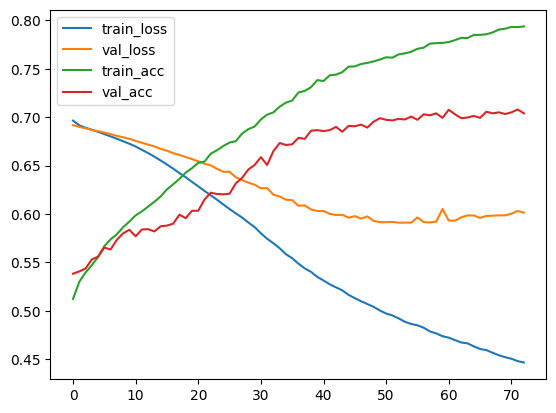

In [ ]:
# 시각화
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs
})
df.plot()
plt.show()

Train/Val 곡선 간격과 Val 손실의 상승/정체 여부로 과적합 및 최적 에폭 구간을 파악한다.